<a href="https://colab.research.google.com/github/fmseyma/GlobalAIHub-SummerCamp22-TransferLearning/blob/main/Cats%26Dogs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import cv2 as cv
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
import random
from shutil import copyfile
import pickle
from google.colab import drive

from google.colab.patches import cv2_imshow

In [9]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [32]:
path_to_image = "/content/drive/MyDrive/PetImages/Dog/10.jpg"

In [33]:
img = cv.imread(path_to_image, cv.IMREAD_COLOR)

In [34]:
type(img)

numpy.ndarray

In [36]:
img

array([[[ 65, 119, 149],
        [ 53, 108, 139],
        [ 45, 101, 136],
        ...,
        [ 96, 119, 134],
        [ 98, 121, 136],
        [ 98, 121, 136]],

       [[ 71, 123, 153],
        [ 60, 114, 145],
        [ 57, 111, 146],
        ...,
        [ 95, 118, 133],
        [ 97, 120, 135],
        [ 97, 120, 135]],

       [[ 69, 119, 147],
        [ 59, 111, 141],
        [ 57, 110, 143],
        ...,
        [ 99, 122, 137],
        [ 98, 121, 136],
        [ 94, 117, 132]],

       ...,

       [[206, 195, 175],
        [205, 194, 174],
        [213, 202, 182],
        ...,
        [ 81,  96,  99],
        [ 80,  95,  98],
        [ 80,  94, 100]],

       [[204, 193, 173],
        [204, 193, 173],
        [207, 196, 176],
        ...,
        [ 81,  96,  99],
        [ 80,  95,  98],
        [ 80,  94, 100]],

       [[206, 195, 175],
        [206, 195, 175],
        [207, 196, 176],
        ...,
        [ 82,  97, 100],
        [ 79,  94,  97],
        [ 77,  91,  97]]

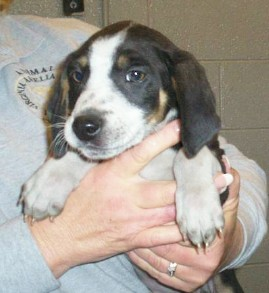

In [42]:
cv2_imshow(img)
#cv.imshow() Colab'da çalışmıyor.
cv.waitKey(0)
cv.destroyAllWindows()

In [43]:
img.shape

(293, 269, 3)

In [44]:
resized = cv.resize(img, (128,128))

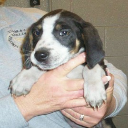

In [47]:
cv2_imshow(resized)
cv.waitKey(0)
cv.destroyAllWindows()

In [48]:
resized.shape

(128, 128, 3)

In [49]:
type(resized)

numpy.ndarray

In [50]:
resized

array([[[ 63, 116, 147],
        [ 49, 106, 143],
        [ 34,  93, 134],
        ...,
        [ 96, 119, 134],
        [ 97, 120, 135],
        [ 97, 120, 135]],

       [[ 61, 109, 137],
        [ 54, 106, 139],
        [ 50, 103, 140],
        ...,
        [ 97, 120, 135],
        [ 97, 120, 135],
        [ 95, 117, 132]],

       [[ 37,  77, 105],
        [ 40,  84, 116],
        [ 50,  96, 128],
        ...,
        [ 97, 121, 134],
        [102, 125, 140],
        [100, 123, 138]],

       ...,

       [[214, 204, 186],
        [218, 208, 190],
        [216, 206, 188],
        ...,
        [ 79,  93,  99],
        [ 82,  96, 103],
        [ 77,  91,  97]],

       [[210, 199, 179],
        [223, 212, 192],
        [223, 212, 192],
        ...,
        [ 80,  95,  98],
        [ 81,  96,  99],
        [ 77,  92,  96]],

       [[204, 194, 174],
        [213, 202, 182],
        [214, 203, 183],
        ...,
        [ 77,  92,  95],
        [ 81,  96,  99],
        [ 79,  94,  98]]

In [55]:
path_to_dataset = "/content/drive/MyDrive/PetImages"

In [56]:
categories = ["Cat", "Dog"]

In [57]:
def normalize(x):
  x = (x-x.min())/(x.max()-x.min())
  return x

In [58]:
images = []
errors_file = open("errors.txt", "a")
error = 0
number = 0

for category in categories:
  idx = categories.index(category)
  img_per_category = 0 
  for image in os.listdir(f"{path_to_dataset}/{category}"):
    if img_per_category == 25000:
      break
    path_to_image = f"{path_to_dataset}/{category}/{image}"
    
    try:
      img = cv.imread(path_to_image, cv.IMREAD_COLOR)
      img = cv.resize(img, (128,128))
      img = normalize(img)
      images.append([img, idx])
      img_per_category += 1

    except Exception as e:
      error += 1 
      errors_file.write(f"{error} | {e} \n")

    finally:
      number += 1

    print(f"\rProcessed: {number} | Errors: {error}", end ="")
  
  errors_file.close()

Processed: 392 | Errors: 1

ValueError: ignored

In [ ]:
np.array(images)[:,1]

In [ ]:
for _ in range(10):
  random.shuffle(images)

In [ ]:
np.array(images)[:,1]

In [ ]:
X = []
y = []

for image, idx in images:
  X.append(image)
  y.append(idx)

In [ ]:
len(X)
len(y)

In [ ]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

In [ ]:
X_train = X[:2000]
y_train = y[:2000]

X_val = X[20000:22500]
y_val = y[20000::22500]

X_test = X[22500:]
y_test = y[22500:]

In [ ]:
X_train = np.arrray(X_train)
y_train = np.arrray(y_train)

X_val = np.arrray(X_val)
y_val = np.arrray(y_val)

X_test = np.arrray(X_test)
y_test = np.arrray(y_test)

In [ ]:
print(len(X_train))
print(len(y_train))

print(len(X_val))
print(len(y_val))

print(len(X_test))
print(len(y_test))

In [ ]:
print(X_train[0].shape)
print(X_val[0].shape)
print(X_test[0].shape)

In [ ]:
with open("X_train.pickle", "wb") as f:
  pickle.dump(X_train, f)

with open("y_train.pickle", "wb") as f:
  pickle.dump(y_train, f)

with open("X_val.pickle", "wb") as f:
  pickle.dump(X_val, f)

with open("y_val.pickle", "wb") as f:
  pickle.dump(y_val, f)

with open("X_test.pickle", "wb") as f:
  pickle.dump(X_test, f)

with open("y_test.pickle", "wb") as f:
  pickle.dump(y_test, f)